In [2]:
import numpy as np
def calculabiocalor(tambiente, h):
#  Criando as matrizes necessárias
    C = np.zeros((17, 17), dtype=np.float64)
    Su = np.zeros((17, 1), dtype=np.float64)
#  Condutividades térmicas (K) em W/m K:
    epidermis_K = 0.24
    dermis_K = 0.45
    fatty_K = 0.21
    muscle_K = 0.5
#  Temperaturas em Kelvin:
    Ta = 310.15
    Tc = 310.15
#  Demais dados:
    Qmet = 1000  # Calor metabólico em W/m³
    Cb = 4200  # Calor específico do sangue em J/Kg K
    Pb = 1000  # Massa específica do sangue em Kg/m³
    Wb = 5e-4  # Perfusão sanguínea em ml/s ml
#  Criando os espaçamentos Δx em metro:
    dx1 = 80e-6  # de i = 0 até i = 1
    dx2 = 2e-3  # de i = 1 até i = 2
    dx3 = 2.5e-3  # de i = 3 até i = 7
    dx4 = 2e-3  # de i = 7 até i = 16
#  Definindo o domínio discreto de cálculo:
    x = [0, dx1, dx1 + dx2]
    for i in range(1, 5):
        n = dx1 + dx2 +i*dx3
        x.append(n)
    for j in range(1, 11):
        a = x[6] + j*dx4
        x.append(a)
#  Definindo a matriz de coeficientes:
#  Em x = 0: transferência de calor na epiderme até a temperatura limite com a derme.
    C[0, 0] = (epidermis_K/dx1) + h
    C[0, 1] = -(epidermis_K/dx1)
    Su[0] = h*tambiente
#  Em x = 1: transferência de calor na derme até a temperatura limite com a gordura.
    C[1, 0] = (epidermis_K/dx1)
    C[1, 1] = -((epidermis_K/dx1) + (dermis_K/dx2) + (Pb*Wb*Cb/2)*(dx1 + dx2))
    C[1, 2] = (dermis_K/dx2)
    Su[1] = -(Pb*Wb*Cb*Ta/2)*(dx1 + dx2)
#  Em x = 2: transferência no limite para a gordura.
    C[2, 1] = (dermis_K/dx2)
    C[2, 2] = -((dermis_K/dx2) + (fatty_K/dx3) + (Pb*Cb*Wb/2)*(dx2 + dx3))
    C[2, 3] = (fatty_K/dx3)
    Su[2] = - ((Pb*Wb*Cb*Ta/2)*(dx2 + dx3) + (Qmet/2)*(dx2 + dx3))
#  Em 3 <= x <= 6:
    for i in range(3, 7):
        C[i, i - 1] = (1/(dx3**2))
        C[i, i] = - ((2/(dx3**2)) + (Pb*Wb*Cb/fatty_K))
        C[i, i + 1] = (1/(dx3**2))
        Su[i] = -((Qmet/fatty_K) + (Pb*Wb*Cb*Ta/fatty_K))
#  Em x = 7 há outro encontro de camadas.
    C[7, 6] = (fatty_K/dx3)
    C[7, 7] = -((fatty_K/dx3) + (muscle_K/dx4) + (Pb*Wb*Cb/2)*(dx3 + dx4))
    C[7, 8] = (muscle_K/dx4)
    Su[7] = -((Pb*Wb*Cb*Ta/2) + (Qmet/2))*(dx3 + dx4)
    for i in range(8, 16):
        C[i, i - 1] = (1/(dx4**2))
        C[i, i] = - ((2/(dx4**2)) + (Pb*Wb*Cb/muscle_K))
        C[i, i + 1] = (1/(dx4**2))
        Su[i] = -((Qmet/muscle_K) + (Pb*Wb*Cb*Ta/muscle_K))
#  Para x = 16:
    C[16, 15] = (1/(dx4**2))
    C[16, 16] = - ((2/(dx4**2)) + (Pb*Wb*Cb/muscle_K))
    Su[16] = - ((Qmet/muscle_K) + (Pb*Wb*Cb*Ta/muscle_K) + (Tc/(dx4**2)))
    T = np.linalg.solve(C, Su)
    return x, T

In [10]:
#  Obtenção dos resultados de interesse (variando o h e mantendo Tambiente = 298,15 K)
x1, T1 = calculabiocalor(298.15, 5)
x2, T2 = calculabiocalor(298.15, 10)
x3, T3 = calculabiocalor(298.15, 15)
x4, T4 = calculabiocalor(298.15, 20)
#  Obter T em graus celsius
T_Celsius1 = []
for i in T1:
    a = i - 273.15
    T_Celsius1.append(a)
T_Celsius2 = []
for i in T2:
    a = i - 273.15
    T_Celsius2.append(a)
T_Celsius3 = []
for i in T3:
    a = i - 273.15
    T_Celsius3.append(a)
T_Celsius4 = []
for i in T4:
    a = i - 273.15
    T_Celsius4.append(a)
#  Exibindo os resultados
import pandas as pd
data = [[x1], [T_Celsius1], [T_Celsius2], [T_Celsius3], [T_Celsius4]]
df = pd.DataFrame(data)
print(df)
print(x1)

                                                   0
0  [0, 8e-05, 0.0020800000000000003, 0.0045800000...
1  [[35.22197041809079], [35.23900703545428], [35...
2  [[33.714290921958025], [33.74333855836454], [3...
3  [[32.59419289324035], [32.63216385770653], [33...
4  [[31.729244340559205], [31.774105969496247], [...
[0, 8e-05, 0.0020800000000000003, 0.004580000000000001, 0.00708, 0.00958, 0.01208, 0.01408, 0.01608, 0.01808, 0.02008, 0.022080000000000002, 0.02408, 0.02608, 0.02808, 0.030080000000000003, 0.03208]


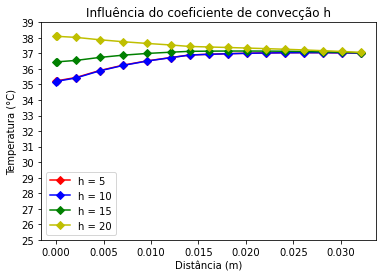

In [5]:
#  Plotando os gráficos necessários
import matplotlib.pyplot as plt
plt.plot(x1, T_Celsius1, color='r', label='h = 5', marker='D')
plt.plot(x1, T_Celsius2, color='b', label='h = 10', marker='D')
plt.plot(x1, T_Celsius3, color='g', label='h = 15', marker='D')
plt.plot(x1, T_Celsius4, color='y', label='h = 20', marker='D')
plt.yticks([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
plt.xlabel("Distância (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Influência do coeficiente de convecção h")
plt.legend()
plt.show()

In [11]:
#  Validação
import math
def biocaloranalitico(Ts, h, k, L, A, x):
#Ts = 298.15
    Ta = 310.15
    Tc = 310.15
    Qmet = 1000  # Calor metabólico em W/m³
    Cb = 4200  # Calor específico do sangue em J/Kg K
    Pb = 1000  # Massa específica do sangue em Kg/m³
    Wb = 5e-4  # Perfusão sanguínea em ml/s ml
    Q = Tc + Qmet/(Wb*Pb*Cb)
    solucao = []
    for i in x:
        Num1 = -(Qmet/(Wb*Pb*Cb))*(math.sqrt(A)*math.cosh(math.sqrt(A)*i)+(h/k)*math.sinh(math.sqrt(A)*i))
        Den = math.sqrt(A)*math.cosh(math.sqrt(A)*L)+(h/k)*math.sinh(math.sqrt(A)*L)
        Num2 = (h/k)*(Ts - Tc - (Qmet/(Wb*Pb*Cb))*math.sinh(math.sqrt(A)*(L - i)))
        T_analitico = Q + Num1/Den + Num2/Den
        solucao.append(T_analitico)
    solucao_celsius = []
    for j in solucao:
        celsius = j - 273.15
        solucao_celsius.append(celsius)
    return solucao

#  Criando os espaçamentos Δx em metro:
dx1 = 8e-5 # de i = 0 até i = 1
dx2 = 2e-3  # de i = 1 até i = 2
dx3 = 2.5e-3  # de i = 3 até i = 7
dx4 = 2e-3  # de i = 7 até i = 16
#h = 10
#  Espessuras dos tecidos em metros:
epidermis_L = 8e-5
dermis_L = 2e-3 + epidermis_L
fatty_L = 10e-3 + dermis_L
muscle_L = 20e-3 + fatty_L
L = epidermis_L + dermis_L + fatty_L + muscle_L
#  Definindo o domínio discreto de cálculo:
x = [0, dx1, dx1 + dx2]
for i in range(1, 5):
    n = dx1 + dx2 +i*dx3
    x.append(n)
for j in range(1, 11):
    a = x[6] + j*dx4
    x.append(a)
#  Fatiando as regiões
x_epidermis = []
x_dermis = []
x_fatty = []
x_muscle = []
for m in range(0, 17):
    if m <= 1:
        x_fatia = x[m]
        x_epidermis.append(x_fatia)
    if m > 1 and m <= 2:
        x_fatia = x[m]
        x_dermis.append(x_fatia)
    if m > 2 and m < 6:
        x_fatia = x[m]
        x_fatty.append(x_fatia)
    if m >= 6:
        x_fatia = x[m]
        x_muscle.append(x_fatia)
#  Definindo constantes auxiliares de cálculo
Ta = 310.15
Tc = 310.15
Qmet = 1000  # Calor metabólico em W/m³
Cb = 4200  # Calor específico do sangue em J/Kg K
Pb = 1000  # Massa específica do sangue em Kg/m³
Wb = 5*10**(-4)  # Perfusão sanguínea em ml/s ml
epidermis_K = 0.24
dermis_K = 0.45
fatty_K = 0.21
muscle_K = 0.5
A_epidermis = Wb*Pb*Cb/epidermis_K
A_dermis = Wb*Pb*Cb/dermis_K
A_fatty = Wb*Pb*Cb/fatty_K
A_muscle = Wb*Pb*Cb/muscle_K
T_epidermisanalitico = biocaloranalitico(298.15, 10, epidermis_K, epidermis_L, A_epidermis, x_epidermis)
T_dermisanalitico = biocaloranalitico(298.15, 10, dermis_K, dermis_L + epidermis_L, A_dermis, x_dermis)
T_fattyanalitico = biocaloranalitico(298.15, 10, fatty_K, dermis_L + epidermis_L + fatty_L, A_fatty, x_fatty)
T_muscleanalitico = biocaloranalitico(298.15, 10, muscle_K, L, A_muscle, x_muscle)
T_analitico = []
for i in T_epidermisanalitico:
    T_analitico.append(i)
for i in T_dermisanalitico:
    T_analitico.append(i)
for i in T_fattyanalitico:
    T_analitico.append(i)
for i in T_muscleanalitico:
    T_analitico.append(i)
#Erro
erro = []
for i in range(0, 17):
    auxiliar = (T_analitico[i] - T2[i])/T_analitico[i]
    erro.append(auxiliar)
erro_percentual = []
for j in erro:
    aux = abs(j)*100
    erro_percentual.append(aux)
erro_percentual_medio = np.mean(erro_percentual)
print(f' O erro percentual médio é de {erro_percentual_medio}%.')


 O erro percentual médio é de 0.1684590837468732%.


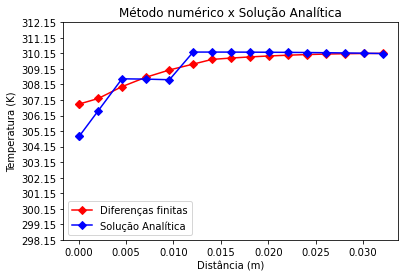

In [12]:
#  Printando os resultados numéricos de h = 10 e T = 298,15 K
plt.plot(x1, T2, color='r', label='Diferenças finitas', marker='D')
plt.plot(x1, T_analitico , color='b', label='Solução Analítica', marker='D')
plt.yticks([298.15, 299.15, 300.15, 301.15, 302.15, 303.15, 304.15, 305.15, 306.15, 307.15, 308.15, 309.15, 310.15, 311.15, 312.15])
plt.xlabel("Distância (m)")
plt.ylabel("Temperatura (K)")
plt.title("Método numérico x Solução Analítica")
plt.legend()
plt.show()